
 172 – Factorial Trailing Zeroes

 343 – Integer Break

 263 – Ugly Number

 264 – Ugly Number II
 
 326 – Power of Three

#  172 – Factorial Trailing Zeroes


Given an integer n, find how many trailing zeroes are there in n!
(i.e., factorial of n).

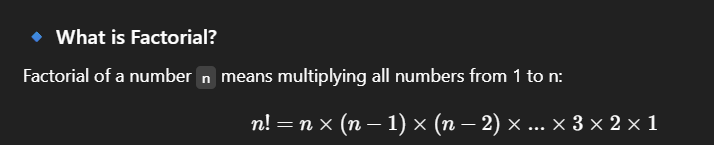

##### 5! = 5 × 4 × 3 × 2 × 1 = 120

Now look at 120 → it has 1 trailing zero.
So, output = 1

##### 10! = 3628800  

3628800 me → 2 trailing zeroes

Answer: 2

Trailing zeros = zeros that appear at the end of a number.

| Step | n (current) | n // 5 | count (add n//5) | Total count |
| ---- | ----------- | ------ | ---------------- | ----------- |
| 1️⃣  | 100         | 20     | count = 0 + 20   | 20          |
| 2️⃣  | 20          | 4      | count = 20 + 4   | 24          |
| 3️⃣  | 4           | 0      | Loop ends        | ✅ 24        |

n = 100

In [ ]:
class Solution:
    def trailingZeroes(self, n:int)->int:
        count = 0
        while n > 0: #100>0, 20>0
            n//=5 # 100//5 =20, 20//5=4
            count += n # 0+20=20, 20+4=24
        return count  
# Example usage:
print(Solution().trailingZeroes(5))     # Output: 1
print(Solution().trailingZeroes(10))    # Output: 2
print(Solution().trailingZeroes(25))    # Output: 6
print(Solution().trailingZeroes(100))   # Output: 24  

#  343 – Integer Break

You are given an integer n, and you need to break it into the sum of at least two positive integers —
for example, n = 10 → 10 = 3 + 3 + 4.

Your goal is to maximize the product of those integers.

Return the maximum product you can get.


| Step | Condition          | product *=3 | n = n-3 | Action / Explanation |
| ---- | ------------------ | ------- | -- | -------------------- |
| 1    | n = 10 → n <= 3? ❌ | —       | 10 | Skip base case       |
| 2    | Initialize         | 1       | 10 | product = 1          |
| 3    | n > 4? ✅  = 10>4        | 1×3=3   | 10-3=7  | Subtract 3           |
| 4    | n > 4? ✅  = 7>4       | 3×3=9   | 7-3=4  | Subtract 3           |
| 5    | n > 4? ❌  = 4>4          | —       | 4  | Stop loop            |
| 6    | Return             | —       | —  | **9×4 = 36 ✅**       |


In [ ]:
class Solution:
    def integerBreak(self, n:int)->int:
        if n <= 3:   # 2
           return n-1 #1
        product = 1
        while n > 4:# 10>4, 7>4
            product *= 3 #1*3 =3 , 3*3=9
            n -= 3 # 10-3=7,7-3 =4
        return product * n    #9 *4 = 36
print(Solution().integerBreak(10))  # 36
print(Solution().integerBreak(8))   # 18
print(Solution().integerBreak(5))   # 6    
        


36
18
6



# 263 – Ugly Number


An ugly number is a positive integer that has only the prime factors 2, 3, or 5.

That means —
if you repeatedly divide the number by 2, 3, or 5 (whenever possible) —
you should finally get 1 if it’s an ugly number.

#### ⚙️ Approach:

If n <= 0, return False (since ugly numbers are positive only).

Keep dividing n by 2, 3, or 5 while it’s divisible.

After all divisions, if the number becomes 1, it’s ugly.
Otherwise, it’s not ugly.

n=6
| Step | Code Line                         | prime | n (before) | Condition Checked | Action / Update         | n (after) |
| ---- | --------------------------------- | ----- | ---------- | ----------------- | ----------------------- | --------- |
| 1    | `if n <= 0:`                      | –     | 6          | 6 ≤ 0? ❌          | Skip                    | 6         |
| 2    | Start loop `for prime in [2,3,5]` | 2     | 6          | –                 | Enter loop              | 6         |
| 3    | `while n % 2 == 0:`               | 2     | 6          | 6 % 2 == 0 ✅      | Divide → `n //= 2`      | 3         |
| 4    | `while n % 2 == 0:`               | 2     | 3          | 3 % 2 == 0 ❌      | Exit inner loop         | 3         |
| 5    | Next `prime = 3`                  | 3     | 3          | –                 | Enter loop              | 3         |
| 6    | `while n % 3 == 0:`               | 3     | 3          | 3 % 3 == 0 ✅      | Divide → `n //= 3`      | 1         |
| 7    | `while n % 3 == 0:`               | 3     | 1          | 1 % 3 == 0 ❌      | Exit inner loop         | 1         |
| 8    | Next `prime = 5`                  | 5     | 1          | 1 % 5 == 0 ❌      | Skip                    | 1         |
| 9    | End loop                          | –     | 1          | –                 | Return check `n == 1` ✅ | **True**  |


In [ ]:
class Solution():
    def isUgly(self, n:int)-> bool:
        if n <= 0:
            return False
        for prime in [2,3,5]:
            while n % prime == 0: #6 % 2 == 0 #3%3 =0, 1%5==0
                n//=prime # 6//2=3, 3//3=1
        return n == 1  

# Example usage
sol = Solution()
print(sol.isUgly(6))   # ✅ True
print(sol.isUgly(1))   # ✅ True
print(sol.isUgly(14))  # ❌ False          

True
True
False



 # 264 – Ugly Number II
 


# 🎯 Problem  

Find the **n-th ugly number**,  
where an *ugly number* has only **2, 3, or 5** as its prime factors.  

**Example sequence:**  
`1, 2, 3, 4, 5, 6, 8, 9, 10, 12, ...`

---

# 💡 Intuition  

Each ugly number is formed by multiplying a previous ugly number by **2**, **3**, or **5**.  

We can imagine three separate sequences:  

×2 → 2, 4, 6, 8, 10, 12, ...

×3 → 3, 6, 9, 12, 15, ...

×5 → 5, 10, 15, 20, ...


At each step, we **pick the smallest number** among these to get the next ugly number.  

#### 💡 Idea  

Instead of checking every number, we **generate ugly numbers in increasing order** using **Dynamic Programming + 3 pointers**.

---

##### We Maintain  
`ugly[]` → list of all generated ugly numbers  

---

##### Three Pointers  
- **i2** → points to the next multiple of 2  
- **i3** → points to the next multiple of 3  
- **i5** → points to the next multiple of 5  

---

At each step:  
👉 Compute the next candidates:  
- next2 = ugly[i2] * 2
- next3 = ugly[i3] * 3
- next5 = ugly[i5] * 5

👉 Pick the **minimum** of these values  
👉 Append it to `ugly[]`  
👉 Increment whichever pointer(s) produced that minimum  

Let’s find n = 10.
| Step  | i2 | i3 | i5 | next2  | next3  | next5  | next_ugly | ugly list after append  |
| ----- | -- | -- | -- | ------ | ------ | ------ | --------- | ----------------------- |
| Start | 0  | 0  | 0  | 1×2=2  | 1×3=3  | 1×5=5  | 2         | [1,2]                   |
| 1     | 1  | 0  | 0  | 2×2=4  | 1×3=3  | 1×5=5  | 3         | [1,2,3]                 |
| 2     | 1  | 1  | 0  | 2×2=4  | 2×3=6  | 1×5=5  | 4         | [1,2,3,4]               |
| 3     | 2  | 1  | 0  | 3×2=6  | 2×3=6  | 1×5=5  | 5         | [1,2,3,4,5]             |
| 4     | 2  | 1  | 1  | 3×2=6  | 2×3=6  | 2×5=10 | 6         | [1,2,3,4,5,6]           |
| 5     | 3  | 2  | 1  | 4×2=8  | 3×3=9  | 2×5=10 | 8         | [1,2,3,4,5,6,8]         |
| 6     | 4  | 2  | 1  | 5×2=10 | 3×3=9  | 2×5=10 | 9         | [1,2,3,4,5,6,8,9]       |
| 7     | 4  | 3  | 1  | 5×2=10 | 4×3=12 | 2×5=10 | 10        | [1,2,3,4,5,6,8,9,10]    |
| 8     | 5  | 3  | 2  | 6×2=12 | 4×3=12 | 3×5=15 | 12        | [1,2,3,4,5,6,8,9,10,12] |

ugly = [1,2,3,4,5,6,8,9,10,12]

10th ugly number = 12




## ⚙️ Why Multiple Pointers Move  

**Example 1:**  
`next2 = 4, next3 = 6, next5 = 10 → min = 4`  
→ Only **i2** moves  

**Example 2 (value = 6):**  
`next2 = 6, next3 = 6, next5 = 10 → min = 6`  
→ Both **i2** and **i3** move *(avoid duplicates)*  

**Example 3 (value = 10):**  
`next2 = 10, next3 = 12, next5 = 10 → min = 10`  
→ Both **i2** and **i5** move  


In [ ]:
class Solution:
    def nthUglyNumber(self, n:int)-> int:
        ugly = [1]  # first ugly number is 1
        i2 = i3 = i5 = 0  # pointers for multiples of 2, 3, and 5
        while len(ugly) < n:
            next2 = ugly[i2]*2
            next3 = ugly[i3]*2
            next5 = ugly[i5]*2
            next_ugly = min(next2,next3,next5)
            ugly.append(next_ugly)
            
            if next_ugly == next2:
                i2+=1
            
            if next_ugly == next3:
                i3+=1

            if next_ugly == next5:
                i5+=1    
        return ugly[-1]            

# ✅ Print output for testing
sol = Solution()
n = 10
print(f"The {n}th ugly number is:", sol.nthUglyNumber(n))

       
        


The 10th ugly number is: 512


#  326 – Power of Three

n= 27

| Step | Condition       | Operation / Result           | Outcome |
| ---- | --------------- | ---------------------------- | ------- |
| 1    | n > 0           | 27 > 0                       | ✅ True  |
| 2    | n % 3 == 0 ?    | 27 % 3 = 0 → n = 27 // 3 = 9 | ✅       |
| 3    | n % 3 == 0 ?    | 9 % 3 = 0 → n = 9 // 3 = 3   | ✅       |
| 4    | n % 3 == 0 ?    | 3 % 3 = 0 → n = 3 // 3 = 1   | ✅       |
| 5    | n % 3 == 0 ?    | 1 % 3 = 1                    | ❌       |
| 6    | return n == 1 ? | 1 == 1                       | ✅ True  |

output=>True

n=45

| Step | Condition       | Operation / Result            | Outcome |
| ---- | --------------- | ----------------------------- | ------- |
| 1    | n > 0           | 45 > 0                        | ✅ True  |
| 2    | n % 3 == 0 ?    | 45 % 3 = 0 → n = 45 // 3 = 15 | ✅       |
| 3    | n % 3 == 0 ?    | 15 % 3 = 0 → n = 15 // 3 = 5  | ✅       |
| 4    | n % 3 == 0 ?    | 5 % 3 = 2                     | ❌       |
| 5    | return n == 1 ? | 5 == 1                        | ❌ False |

output=> False

In [7]:
class Solution:
    def isPowerOfThree(self, n:int)->bool:
        if n <= 0:
            return False
        while n % 3 == 0:
            n //= 3
        return n == 1  

# ✅ Test the code
sol = Solution()
nums = [27, 9, 45, 1, 81, 0, -3]

for n in nums:
    print(f"{n} → {sol.isPowerOfThree(n)}")    

27 → True
9 → True
45 → False
1 → True
81 → True
0 → False
-3 → False
